# Exploratory Analysis of Spatial Data: Visualizing Spatial Autocorrelation with `splot` and `esda`

1. Imports
2. Load Example data
3. Assessing Global Spatial Autocorrelation
4. Visualizing Local Autocorrelation Statistics with `splot`
5. Combined visualizations: Moran Local Scatterplot, LISA clustermap and Choropleth map

## Imports

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pysal as ps
import libpysal.api as lp
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import splot

from libpysal import examples

from IPython.display import Image

## Example Data

First, we will load the Guerry.shp data from `examples` in `libpysal`.

In [2]:
link_to_data = examples.get_path('Guerry.shp')
gdf = gpd.read_file(link_to_data)

For this example we will focus on the Donatns (charitable donations per capita) variable. We will calculate Contiguity weights `w` with `ps.queen_from_shapefile()`. Then we transform our weights to be row-standardized.

In [4]:
y = gdf['Donatns'].values
w = lp.Queen.from_dataframe(gdf)
w.transform = 'r'

## Assessing Global Spatial Autocorrelation

We calculate Moran's I. A test for global autocorrelation for a continuous attribute.

In [5]:
from esda.moran import Moran

w = lp.Queen.from_dataframe(gdf)
moran = Moran(y, w)
moran.I

0.3533613255848606

Our value for the statistic is interpreted against a reference distribution under the null hypothesis of complete spatial randomness. PySAL uses the approach of random spatial permutations.

In [6]:
from importlib import reload
from splot.esda import plot_moran

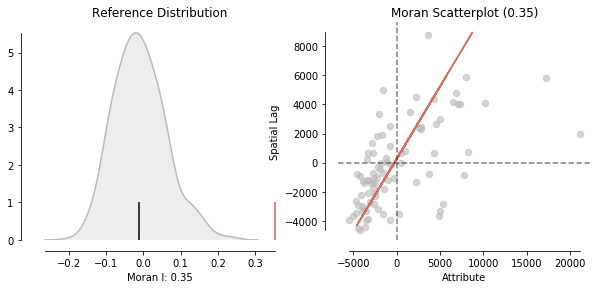

In [7]:
plot_moran(moran, zstandard=True, figsize=(10,4))
plt.show()

Our observed value is statistically significant:

In [8]:
moran.p_sim

0.001

## Visualizing Local Autocorrelation with splot - Hot Spots, Cold Spots and Spatial Outliers

In addition to visualizing Global autocorrelation statistics, splot has options to visualize local autocorrelation statistics. We compute the local Moran `m`. Then, we plot the spatial lag and the Donatns variable in a Moran Scatterplot.

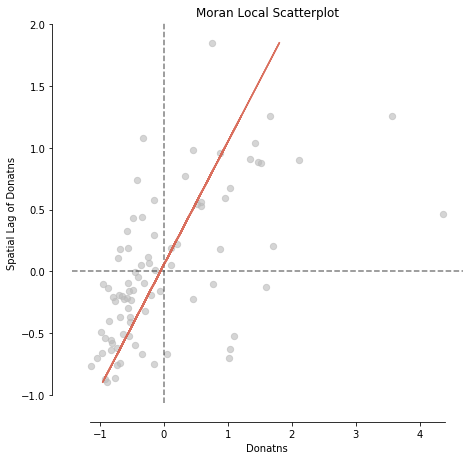

In [9]:
from splot.esda import moran_loc_scatterplot
from esda.moran import Moran_Local
moran_loc = Moran_Local(y, w)
fig, ax = moran_loc_scatterplot(moran_loc)
ax.set_xlabel('Donatns')
ax.set_ylabel('Spatial Lag of Donatns')
plt.show()

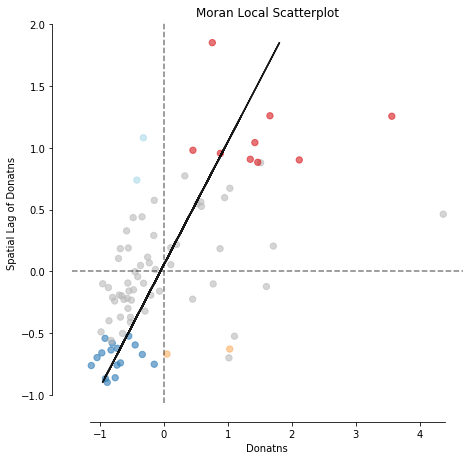

In [10]:
fig, ax = moran_loc_scatterplot(moran_loc, p=0.05)
ax.set_xlabel('Donatns')
ax.set_ylabel('Spatial Lag of Donatns')
plt.show()

We can distinguish the specific type of local spatial autocorrelation in High-High, Low-Low, High-Low, Low-High.
Where the upper right quadrant displays HH, the lower left, LL, the upper left LH and the lower left HL.

These types of local spatial autocorrelation describe similarities or dissimilarities between a specific polygon with its neighbouring polygons. The upper left quadrant for example indicates that polygons with low values are surrounded by polygones with high values (LH). The lower right quadrant shows polygons with high values surrounded by neighbors with low values (HL). This indicates an association of dissimilar values.

Let's now visualize the areas we found to be significant on a map:

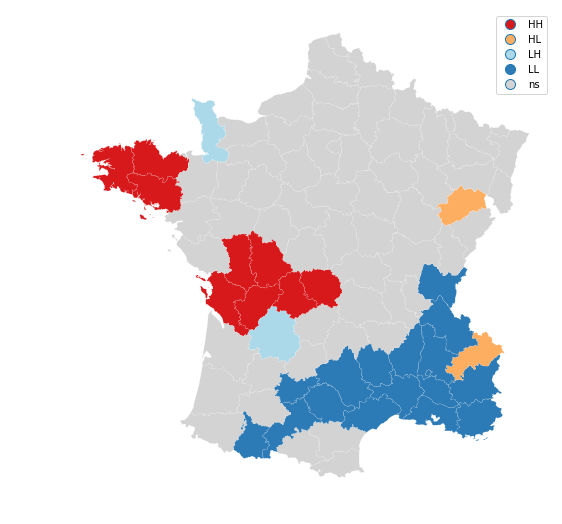

In [11]:
from splot.esda import lisa_cluster

lisa_cluster(moran_loc, gdf, p=0.05, figsize = (9,9))
plt.show()

# Combined visualizations

Often, it is easier to asses once statistical results or interpret these results comparing different visualizations.
Here we for example look at a static visualization of a Moran Scatterplot, LISA cluster map and choropleth map.

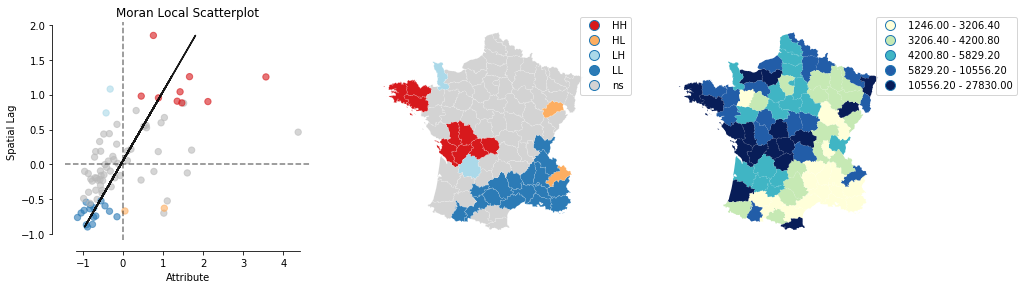

In [13]:
from splot.esda import plot_local_autocorrelation
plot_local_autocorrelation(moran_loc, gdf, 'Donatns')
plt.show()

/Users/steffie/code/geopandas/geopandas/plotting.py:385: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "'color'.", UserWarning)


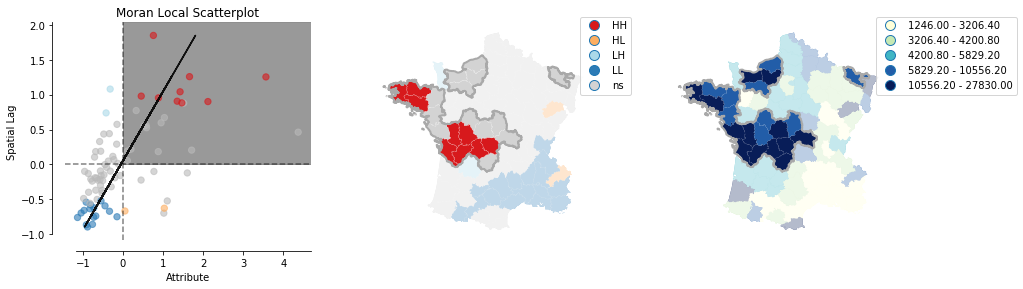

In [14]:
plot_local_autocorrelation(moran_loc, gdf, 'Donatns', quadrant=1)
plt.show()

# Bivariate Moran Statistics

Additionally to assessing the correlation of one variable over space. It is possible to asses two variabes and theyr spatial relationships with so called Bivariate Moran Statistics. which can be found in `esda.moran.Moran_BV`

In [15]:
from esda.moran import Moran_BV
from splot.esda import plot_moran_bv_simulation, moran_bv_scatterplot, plot_moran_bv

Bivariate Moran Statistics hereby describe the correlation between one variable and the spatial lag of another variable. Therefore we have to be careful interpreting our results. Bivariate Moran Statistics do not take the inherent correlation between the two variables at the same location into account. They much more offer a tool to measure the degree one polygone with a specific attribute is correlated with its eighboring polygones with a different attribute.

`splot` can offer help interpreting the results by providing visualizations of reference distributions and a Moran SCatterplot:

In [16]:
x = gdf['Suicids'].values
moran_bv = Moran_BV(x, y, w)

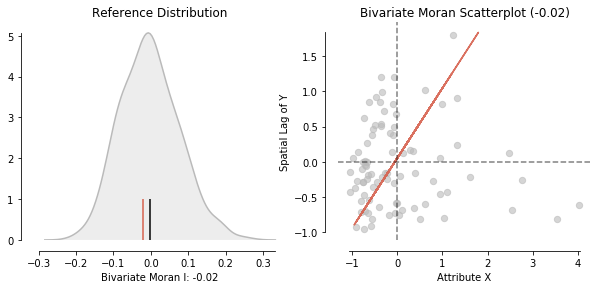

In [17]:
plot_moran_bv(moran_bv)
plt.show()

## Local Bivariate Moran Statistics

Similar to univariate local moran statistics `pysal` and `splot` offer tools to asses local autocorrelation for bivariate analysis:

In [18]:
from esda.moran import Moran_Local_BV
from splot.esda import moran_loc_bv_scatterplot

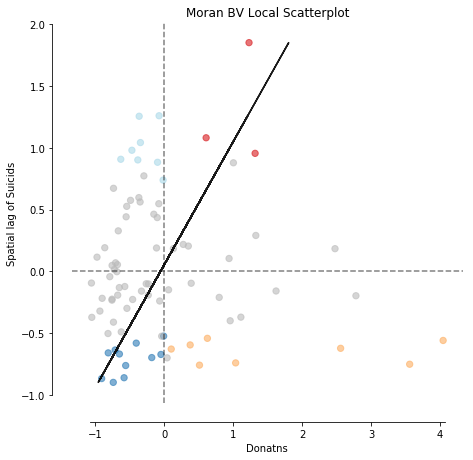

In [19]:
moran_loc_bv = Moran_Local_BV(x, y, w)
fig, ax = moran_loc_bv_scatterplot(moran_loc_bv, p=0.05)
ax.set_xlabel('Donatns')
ax.set_ylabel('Spatial lag of Suicids')
plt.show()

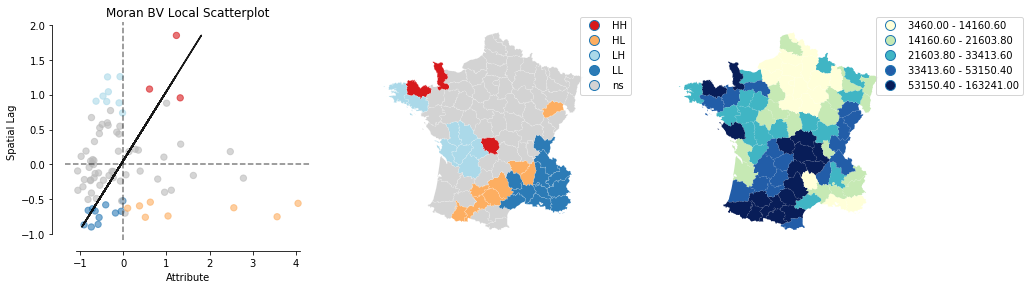

In [21]:
plot_local_autocorrelation(moran_loc_bv, gdf, 'Suicids')
plt.show()